# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Fengyi Xiao
*   **Student number**: 1002956232



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [ ]:
df = cases_raw
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

In [ ]:
### YOUR CODE HERE ###
country_lst = df.index.values
country_lst
labels = set(country_lst)
#!pip install scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def draw_tsplot (df, ctry_lst):
  if len(ctry_lst) == 1:
    plt.plot(df.loc[ctry_lst[0]])
    plt.xlabel = ctry_lst
    plt.ylabel = 'counts'
  else:
    fig, axes = plt.subplots(len(ctry_lst), 1, figsize=(12,12))
    
    for i in np.arange(len(ctry_lst)):
      count = df.loc[ctry_lst[i]].values
      axes[i].plot(count)

      axes[i].set(xlabel= ctry_lst[i], ylabel='counts')


  

In [ ]:
df_std_val = StandardScaler().fit_transform(df.values)
df_std = pd.DataFrame(data = df_std_val, index= df.index)

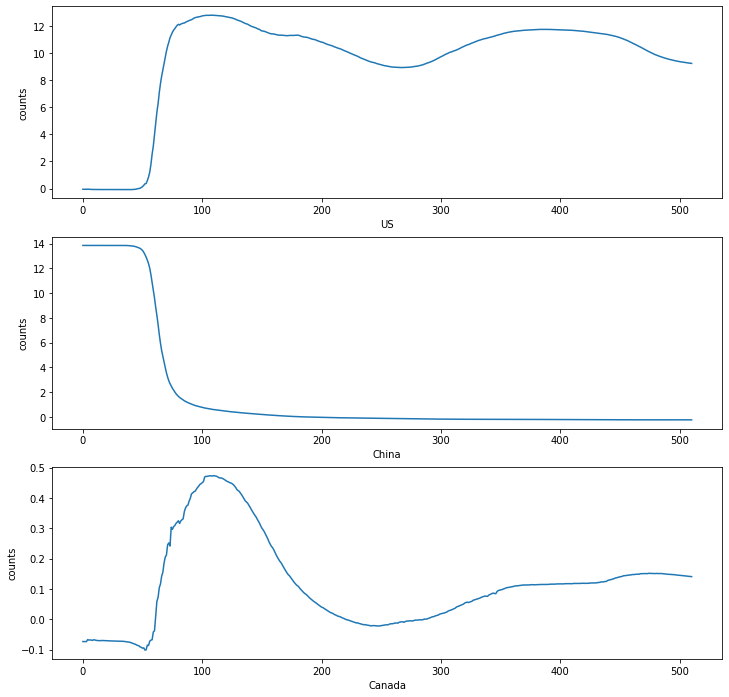

In [ ]:
ctr_lst1 = ['US','China','Canada']
draw_tsplot(df_std, ctr_lst1)

Discuss the trends in the standardized time-series for the US, 
Canada, and China. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate?


*   The trends in the US data shows that it first stay stable, then sharply increase till day 100. After that, it starts to decrease a little and follows a wave curve change.
*   The trends in the China data can be summarized that it starts at a very high level and stay there for about 60 days then sharply decrease. After 100 days, it stays in a very low level and does not change much. 
*   The trends in the Canada data indicates that it starts at a negative level and decrease a little. Then it shaply increase at around day 50. It starts to present a decreasing trend at around day 120 till day 250; However, it presents an increasing trand after day 250.

The curve go up means the confrimed cases number is increasing, the curve goes down means the confirmed cases number is decreasing.
The number of covid cases cannot be negative. If the sign of values is negative, it means the at this time the confirmed case number of this country is below the average case number for this day among all the countries data within this dataset.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
### YOUR CODE HERE ###
n, m = df_std_val.shape
# Compute covariance matrix
C = np.cov(df_std_val.T) 

def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  #print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues) 

  return eigenValues, eigenVectors

eigenValues, eigenVectors = get_sorted_eigen(C)

In [ ]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#cumExpVar

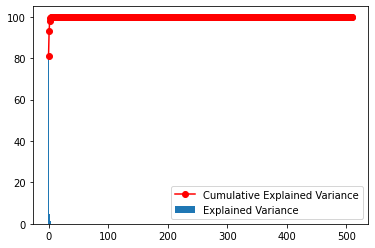

In [ ]:
plt.bar(range(511), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many PCs do you need to cover 99% of the dataset's variance?

We need 4 PSs to cover 99% the dataset's variance cause we can see the cumExpVar array, till the forth elements it exceeds the 99%.

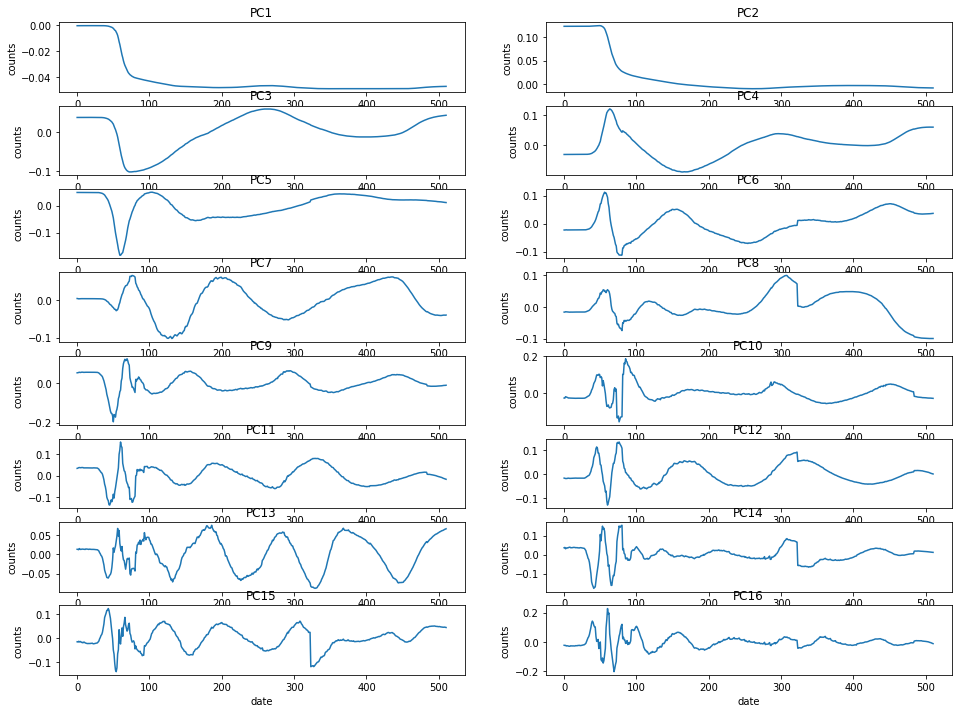

In [ ]:
#4.Plot the first 16 principal components (Eigenvectors) as a time series 
#(16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) 

fig, axes = plt.subplots(8, 2, figsize=(16,12))
time = df.columns.values

for i in range(16):
  count = eigenVectors[:,i]
  axes = axes.flatten()
  axes[i].plot(count)

  axes[i].set(xlabel= 'date', ylabel='counts', title = 'PC' + str(i + 1))

5.Compare the first few PCs with the rest of them. Do you see any difference in their trend?

We notice that when the number of PCs increase, the volatility of the graph is increasing as well. The trend for the first PCs is quite stable and then keep decreasing. When the PCs number increasing, the change of the values are not stable, and have a high volatility at the beginning.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

def plot_country_figures(original_df, country_name):
  df_std_val = StandardScaler().fit_transform(original_df.values)
  df_std = pd.DataFrame(data = df_std_val, index= original_df.index)
  C = np.cov(df_std_val.T) 
  eigenValues, eigenVectors = get_sorted_eigen(C)
  
  #Draw the original time-series for the specified country.
  ctr_lst = [country_name]
  draw_tsplot(original_df, ctr_lst)

  #incremental reconstruction of the original (not standardized) time-series
  #PC_lst = [[1],[1,2],[1,2,3],[1,2,3,4],[1,2,3,4,5]]
  plt.figure()
  plt.title("Reconstruction Original Data")

  for end in [1,2,4,8,16]:
    pc = [x for x in range(1, end + 1)]
    PC_count = len(pc)
    W = eigenVectors[:, 0:PC_count]
    projX = np.dot(df_std_val, W)
    ReconX = np.dot(projX, W.T)
    scaler = StandardScaler()
    org_ReconX = scaler.fit_transform(original_df)
    org_ReconX = scaler.inverse_transform(ReconX)
    reconX_df = pd.DataFrame(data=org_ReconX, index=original_df.index, columns=original_df.columns)
    #print(org_ReconX)
    plt.plot(reconX_df.loc[country_name], label=f"pc1 - pc{end}")
    
    
    #The residual error for your best reconstruction
    if end == 16:
      res = df.values - reconX_df.values
      df_res = pd.DataFrame(data=res, index=original_df.index, columns=original_df.columns)
      

  plt.legend()

  plt.figure()
  plt.title("The residual error")
  plt.plot(df_res.loc[country_name] , label=f"pc1 - pc{end}")

  #The RMSE of the reconstruction
  component_num = []
  rmse_lst = []   
  for n in range(1,11):
    pca = PCA(n_components=n)
    recon = pca.inverse_transform(pca.fit_transform(original_df.values))
    recon_df = pd.DataFrame(data=recon, index=original_df.index, columns=original_df.columns)
    rmse = mean_squared_error(original_df.loc[country_name], recon_df.loc[country_name],squared=False)
    component_num.append(n)
    rmse_lst.append(rmse)
    #print("RMSE: {} with {} components".format(rmse, n))
  plt.figure()
  plt.title("RMSE of the recon")
  #print(component_num)
  #print(rmse_lst)
  plt.plot(component_num,rmse_lst)
  plt.xlabel = "Component Number"
  plt.tlabel = 'RMSE value'   

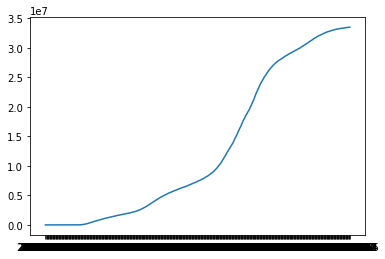

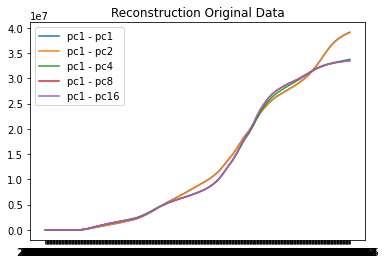

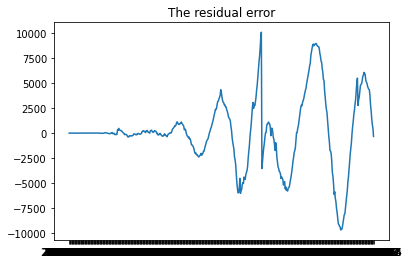

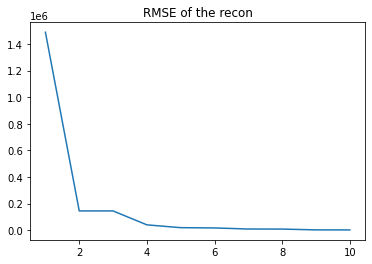

In [ ]:
#Test for the US    
plot_country_figures(df,'US')  

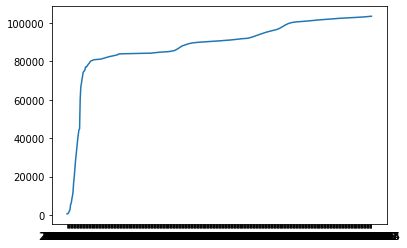

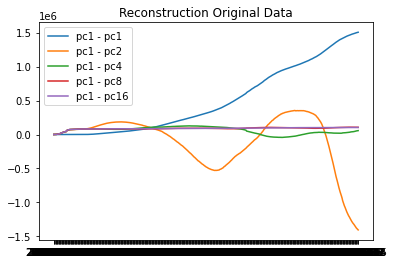

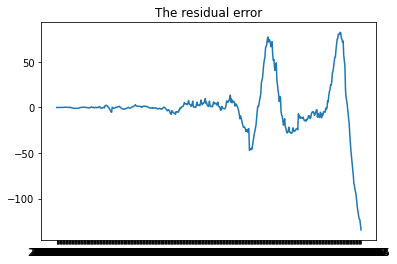

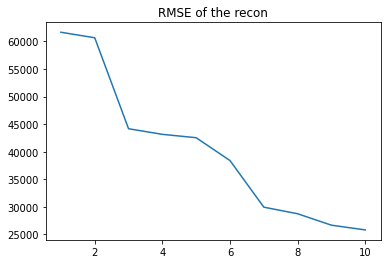

In [ ]:
#Test for China
plot_country_figures(df,'China')  

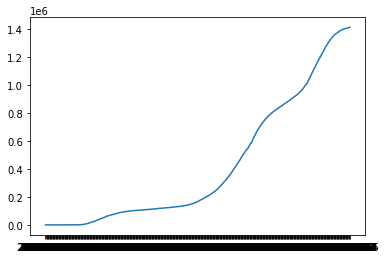

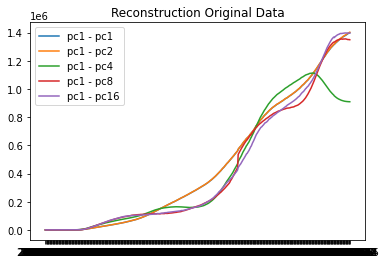

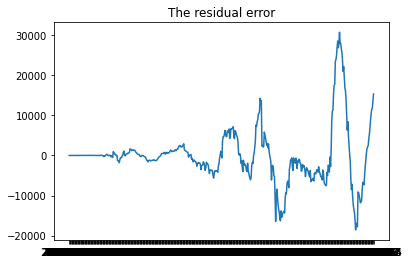

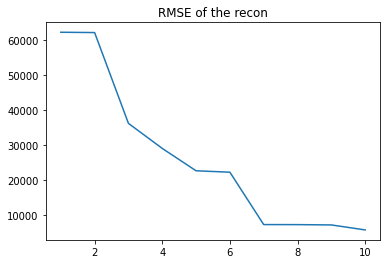

In [ ]:
#Test for Canada
plot_country_figures(df,'Canada')  

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
### YOUR CODE HERE ###
#from surprise import SVD
#from surprise.model_selection import cross_validate, split

def plot_country_figures_SVD(original_df, country_name):
  original_df_array = np.array(original_df.values)
  U, S, V = np.linalg.svd(original_df_array)
  #print(U)
  
  #Draw the original time-series for the specified country.
  ctr_lst = [country_name]
  draw_tsplot(original_df, ctr_lst)

  #incremental reconstruction of the original (not standardized) time-series
  plt.figure()
  plt.title("Reconstruction Original Data_SVD")

  # construct diagonal singular matrix
  n = len(S)
  S_diag = np.zeros((len(original_df), len(original_df.columns)))
  S_diag[:n,:n] = np.diag(S)
  S_diag
  A = U@S_diag@V
  A

  for end in [1,2,4,8,16]:
    pc = [x for x in range(1, end + 1)]
    PC_count = len(pc)
    U_com = U[:,0:PC_count]
    v_com = V[0:PC_count,:]
    reconX = S[0:PC_count]*U_com@v_com
    reconX_df = pd.DataFrame(data=reconX, index=original_df.index, columns=original_df.columns)
    #print(org_ReconX)
    plt.plot(reconX_df.loc[country_name], label=f"pc1 - pc{end}")
    
    
    #The residual error for your best reconstruction
    if end == 16:
      res = original_df.values - reconX_df.values
      df_res = pd.DataFrame(data=res, index=original_df.index, columns=original_df.columns)
      

  plt.legend()

  plt.figure()
  plt.title("The residual error")
  plt.plot(df_res.loc[country_name] , label=f"pc1 - pc{end}")

  #The RMSE of the reconstruction
  component_num = []
  rmse_lst = []   
  for i in range(1,11):
    U_com = U[:,0:i]
    v_com = V[0:i,:]
    recon = S[0:i]*U_com@v_com
    recon_df = pd.DataFrame(data=recon, index=original_df.index, columns=original_df.columns)
    rmse = mean_squared_error(original_df.loc[country_name], recon_df.loc[country_name],squared=False)
    component_num.append(i)
    rmse_lst.append(rmse)
    #print("RMSE: {} with {} components".format(rmse, n))
  plt.figure()
  plt.title("RMSE of the recon_SVD")
  #print(component_num)
  #print(rmse_lst)
  plt.plot(component_num,rmse_lst)
  plt.xlabel = "Component Number"
  plt.tlabel = 'RMSE value'   

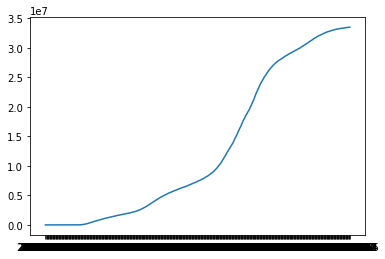

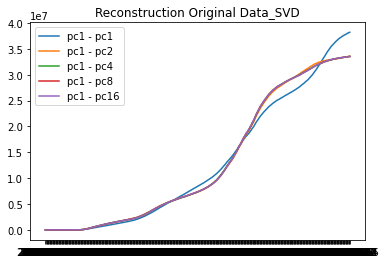

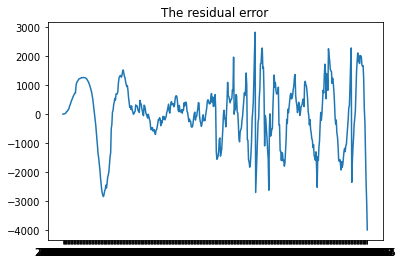

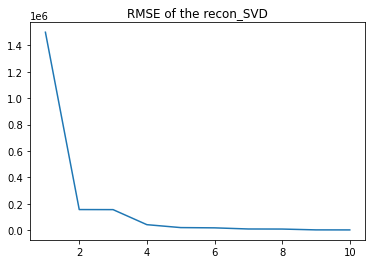

In [ ]:
plot_country_figures_SVD(df,'US') 

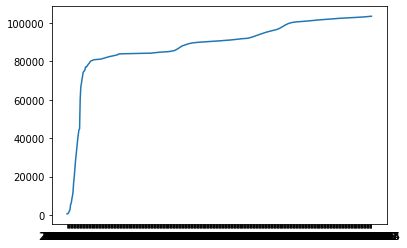

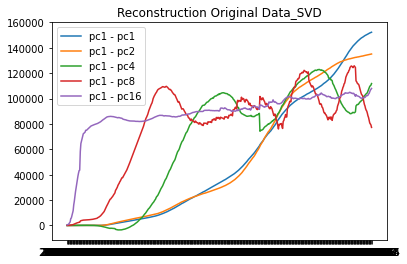

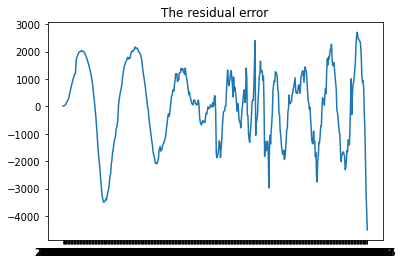

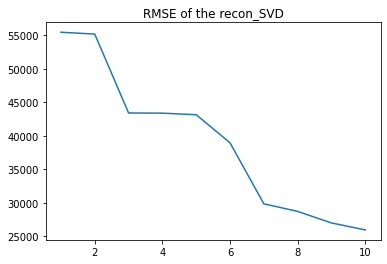

In [ ]:
plot_country_figures_SVD(df,'China') 

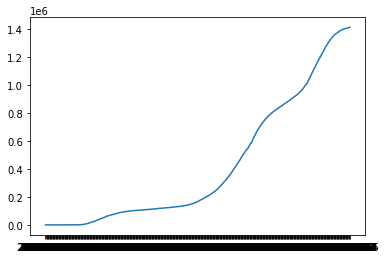

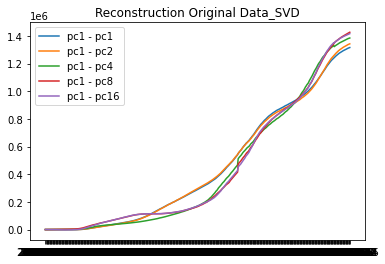

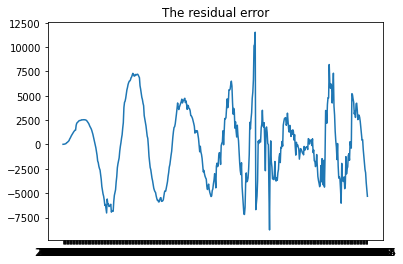

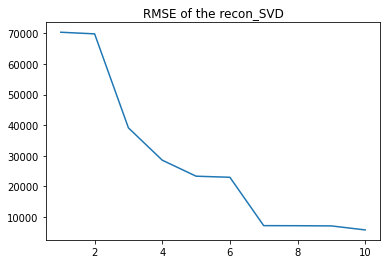

In [ ]:
plot_country_figures_SVD(df,'Canada') 

Explain if standardization or covariance computation is required for this part. Repeat part 3 and compare your PCA and SVD results.

The covariance computation is not required for the SVD according to the algorithm. There is no need to standardize the data if we use SVD. SVD does not require that we normalize data to have zero mean and SVD is guaranteed to work in all circumstances.

We find out that the SVD method fits the China data better. The time-series graph for the US and Canada in this two methods are very similar. The RMSE value for the SVD method for US compared to that in PCA is similar. The RMSE value for the SVD method for China compared to that in PCA is smaller; However, The RMSE value for the SVD method for Canada compared to that in PCA is higher.

Usually the residual error by using SVD is more fluctuate than that in PCA. But the most part of the results by using SVD and PCA are similar.

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving time-series-19-covid-combined_csv.csv to time-series-19-covid-combined_csv.csv


In [ ]:
new_raw = pd.read_csv(
    filepath_or_buffer='time-series-19-covid-combined_csv.csv',
    index_col=0,
    thousands=','
)

In [ ]:
#type(new_raw)
new_data = new_raw.drop(columns=['Recovered', 'Deaths','Province/State'])
new_data = new_data.rename(columns ={'Country/Region': 'Country'})
new_data
modified = new_data.reset_index()
print(modified)
#modified = modified.set_index('Country')
date_range = modified['Date'].unique()
date_range.sort()
#print(date_range)
country_range = modified['Country'].unique()
print(len(country_range))
#new_data.set_index('Country')

              Date      Country  Confirmed
0       2020-01-22  Afghanistan          0
1       2020-01-23  Afghanistan          0
2       2020-01-24  Afghanistan          0
3       2020-01-25  Afghanistan          0
4       2020-01-26  Afghanistan          0
...            ...          ...        ...
181995  2021-10-28     Zimbabwe     132880
181996  2021-10-29     Zimbabwe     132926
181997  2021-10-30     Zimbabwe     132926
181998  2021-10-31     Zimbabwe     132977
181999  2021-11-01     Zimbabwe     133007

[182000 rows x 3 columns]
196


In [ ]:
from collections import defaultdict

confirmed_data = defaultdict(lambda: defaultdict(lambda: 0))
for _, row in modified.iterrows():
  confirmed_data[row['Country']][row['Date']] = row['Confirmed']

data = [[confirmed_data[country][date] for date in date_range] for country in country_range]
final_data = pd.DataFrame(data = data, index = country_range, columns = date_range)
final_data

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8830,8861,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575

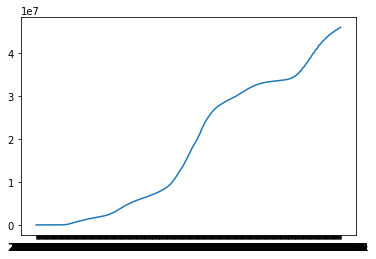

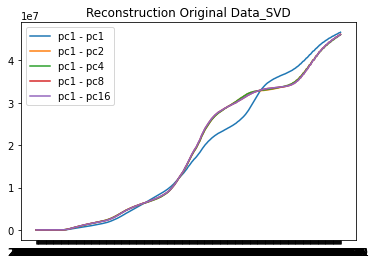

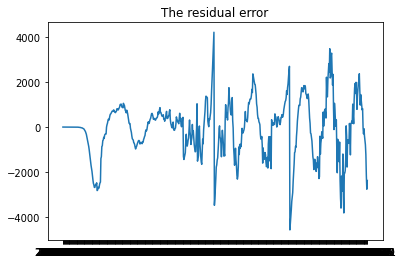

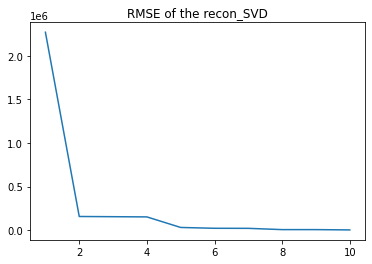

In [ ]:
plot_country_figures_SVD(final_data,'US') 

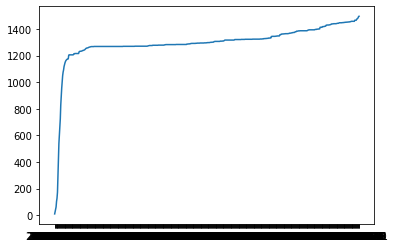

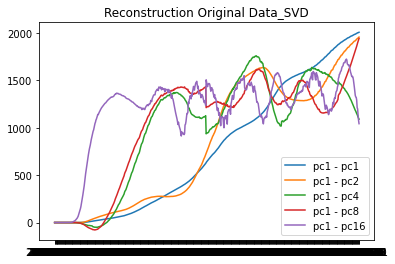

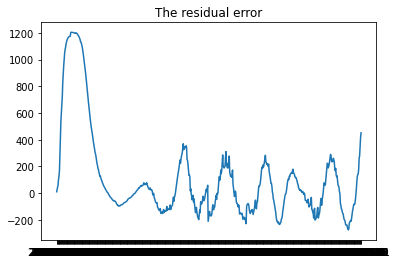

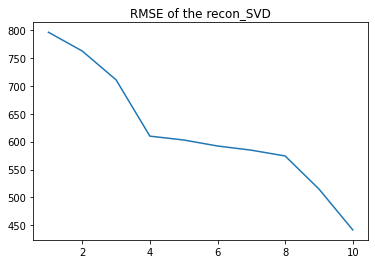

In [ ]:
plot_country_figures_SVD(final_data,'China') 

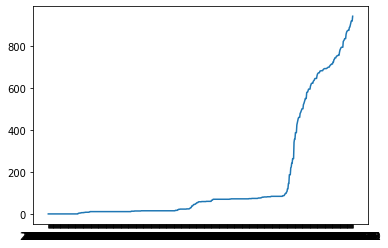

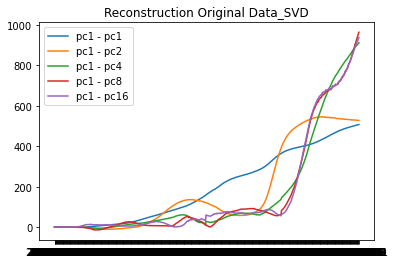

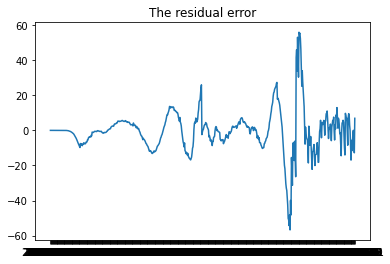

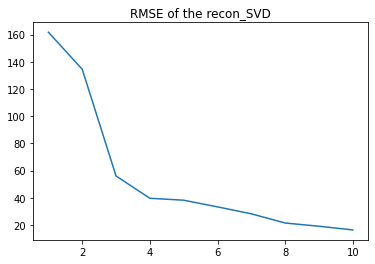

In [ ]:
plot_country_figures_SVD(final_data,'Canada') 

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

